**Problem Statement**   
Predictive analysis to predict the likelihood of diabetes in a patient.

In [37]:
#Import necessary libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', category=UserWarning) 

In [3]:
#Import Dataset
diabetes_dataset = pd.read_csv('diabetes.csv')
diabetes_dataset.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [4]:
#clone the dataset

data = diabetes_dataset

**Data cleaning**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
data.shape

(768, 9)

In [8]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
data["Outcome"] = data["Outcome"].map({0:'No', 1:'Yes'}) #encoding the outcome to show yes and no for 1 and 0 respectively

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,85,66,29,0,26.6,0.351,31,No
2,8,183,64,0,0,23.3,0.672,32,Yes
3,1,89,66,23,94,28.1,0.167,21,No
4,0,137,40,35,168,43.1,2.288,33,Yes


In [45]:
data['Age'].value_counts().sort_index()

Age
21    63
22    72
23    38
24    46
25    48
26    33
27    32
28    35
29    29
30    21
31    24
32    16
33    17
34    14
35    10
36    16
37    19
38    16
39    12
40    13
41    22
42    18
43    13
44     8
45    15
46    13
47     6
48     5
49     5
50     8
51     8
52     8
53     5
54     6
55     4
56     3
57     5
58     7
59     3
60     5
61     2
62     4
63     4
64     1
65     3
66     4
67     3
68     1
69     2
70     1
72     1
81     1
Name: count, dtype: int64

In [46]:
def AgeCategory(value):
    result = value.apply(lambda x: 
        "Aged O to 24" if 0 <= x <= 24
        else ("Aged 25 to 34") if 25 <= x <= 34
        else ("Aged 35 to 44" if 35 <= x <= 44
        else ("Aged 45 to 64") if 45 <= x <= 64
        else ("Aged 65 to 84" if 65 <= x <= 84
        else ("Aged 85 to 100") if 85 <= x <= 100 else np.nan)))
    return result

# Apply the AgeCategory function to the 'Age' column and create a new column 'Age_category'
data['Age_category'] = AgeCategory(data['Age'])

data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_category
0,6,148,72,35,0,33.6,0.627,50,Yes,Aged 45 to 64
1,1,85,66,29,0,26.6,0.351,31,No,Aged 25 to 34


**Exploratory data analysis (EDA)**

Patients demograph

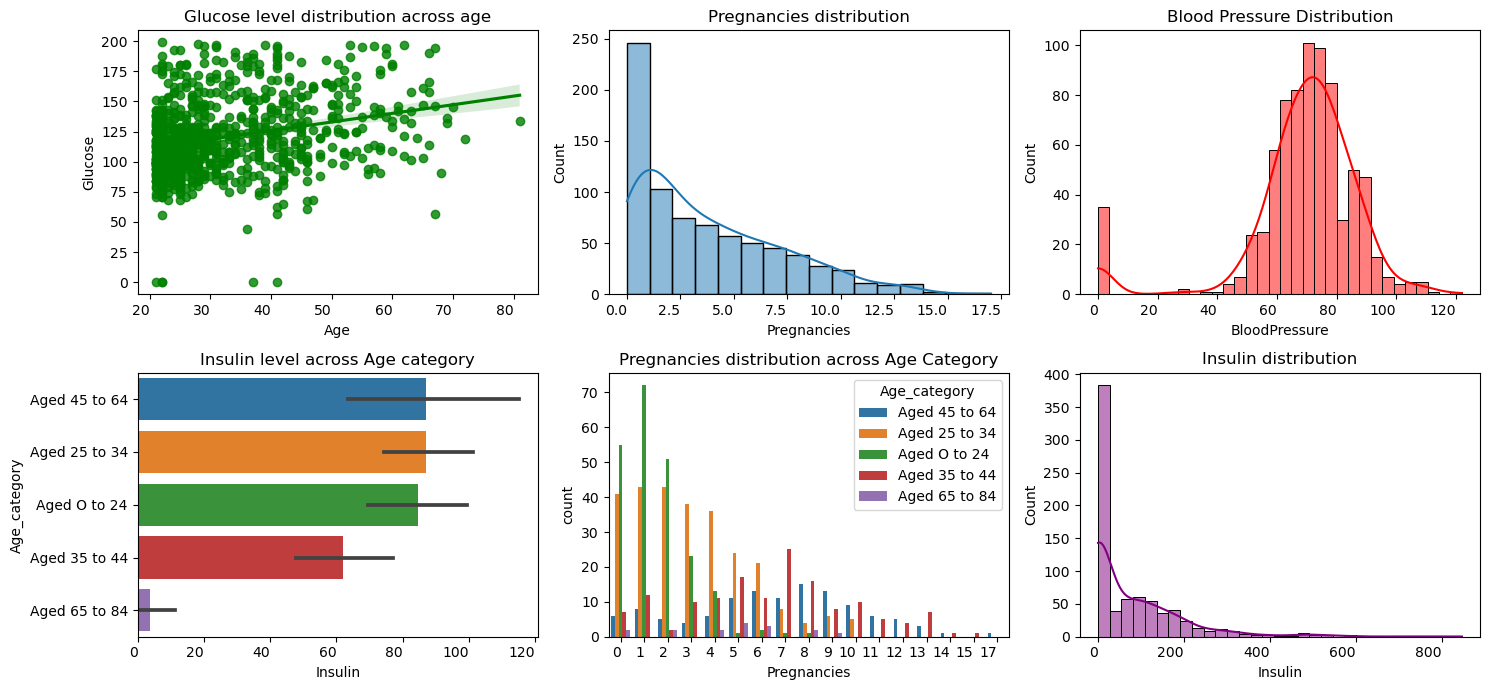

In [66]:
fig, ax = plt.subplots(2,3, figsize=(15,7))

sns.regplot(x='Age', y='Glucose', data=data, color='Green', ax=ax[0,0]).set_title('Glucose level distribution across age')
sns.histplot(x='Pregnancies', kde=True, data=data, ax=ax[0,1]).set_title('Pregnancies distribution')
sns.histplot(x='BloodPressure', kde=True, data=data, color='Red', ax=ax[0,2]).set_title('Blood Pressure Distribution')
sns.barplot(x='Insulin', y='Age_category', data=data, ax=ax[1,0]).set_title('Insulin level across Age category')
sns.countplot(x='Pregnancies', hue='Age_category', data=data, ax=ax[1,1]).set_title("Pregnancies distribution across Age Category")
sns.histplot(x='Insulin', kde=True, data=data, color='Purple',ax=ax[1,2]).set_title('Insulin distribution')

for axes_row in ax:
        for axes in axes_row:
                if axes is not None:
                        axes.set_xticklabels(axes.get_xticklabels(), rotation=0, ha='right')
                        axes.set_title(axes.get_title(), fontsize=12)
        
plt.tight_layout()
plt.show()

**Statistical description**

In [ ]:
num_var = []

**Data Preprocessing**

In [11]:
#Import necessary libraries
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(x)

StandardScaler()

In [14]:
standardized_data = scaler.transform(x)

In [15]:
standardized_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [16]:
x = standardized_data
y = df['Outcome']

In [17]:
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [18]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

**Train Test Split**

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# splitting dataset for test and traing. 80% for training and 20% for testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
x_train

array([[-0.54791859, -1.15469351, -3.57259724, ..., -4.06047387,
        -0.50700636, -1.04154944],
       [ 1.53084665, -0.27837344,  0.66661825, ..., -0.48135115,
         2.44666971,  1.4259954 ],
       [-0.84488505,  0.56664949, -1.19450074, ..., -0.41789153,
         0.55003518, -0.95646168],
       ...,
       [ 1.82781311, -0.62264204,  0.87340925, ...,  1.72704372,
         2.00573238,  0.40494237],
       [-1.14185152,  0.62924378, -3.57259724, ...,  1.32090213,
        -0.8059981 , -0.36084741],
       [-1.14185152,  0.12848945,  1.39038675, ..., -1.20479085,
        -0.63385134, -1.04154944]])

In [22]:
y_train

60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64

In [23]:
print(x.shape, x_train.shape, x_test.shape)

(768, 8) (614, 8) (154, 8)


**Training the Model**

In [24]:
from sklearn import svm

In [25]:
classifier = svm.SVC(kernel='linear')

In [26]:
#training the support vector machine classifier
classifier.fit(x_train, y_train)

SVC(kernel='linear')

**Model Evaluation**

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
#accuracy score on the training data
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [29]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7719869706840391


In [30]:
#accuracy score on the test data
x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [31]:
print(test_data_accuracy)

0.7597402597402597


**Making a Predictive System**

In [32]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Saving the trained model

In [33]:
#for saving the model
import pickle

In [34]:
filename = 'trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [35]:
#loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [36]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
